In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)
mousedrug_df.head()

# Combine the data into a single dataset
pharma_data = pd.merge(clinicaltrial_df, mousedrug_df, how='left', on="Mouse ID")

# Display the data table for preview
pharma_data.head()

pharma_data=pharma_data.rename(columns={"Tumor Volume (mm3)":"Tumor Vol"})
pharma_data.head()

,Mouse ID,Timepoint,Tumor Vol,Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumorvol = pharma_data.groupby(["Drug", "Timepoint"])["Tumor Vol"].mean()

# Convert to DataFrame
tumorvol_df = pd.DataFrame({"Tumor Volume":meantumorvol}).reset_index()

# Preview DataFrame
tumorvol_df.head()

,Drug,Timepoint,Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvol_sem = pharma_data.groupby(["Drug","Timepoint"])["Tumor Vol"].sem()

# Convert to DataFrame
tumorvol_sem_df = pd.DataFrame({"Tumor Vol SEM":tumorvol_sem}).reset_index() 

# Preview DataFrame
tumorvol_sem_df.head()

,Drug,Timepoint,Tumor Vol SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
tumorpivot= tumorvol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume")
tumorpivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [34]:
#Get timept, tumor vol, sem for 4 drugs:

placebo_sem_df = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]== "Placebo"]
placebo_vol_df = tumorvol_df.loc[tumorvol_df["Drug"]== "Placebo"]

placebo_timept = placebo_sem_df["Timepoint"]
placebo_sem = placebo_sem_df["Tumor Vol SEM"]
placebo_vol = placebo_vol_df["Tumor Volume"]


Infubinol_sem_df = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]== "Infubinol"]
Infubinol_vol_df = tumorvol_df.loc[tumorvol_df["Drug"]== "Infubinol"]

Infubinol_timept = Infubinol_sem_df["Timepoint"]
Infubinol_sem = Infubinol_sem_df["Tumor Vol SEM"]
Infubinol_vol = Infubinol_vol_df["Tumor Volume"]


Capomulin_sem_df = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]== "Capomulin"]
Capomulin_vol_df = tumorvol_df.loc[tumorvol_df["Drug"]== "Capomulin"]

Capomulin_timept = Capomulin_sem_df["Timepoint"]
Capomulin_sem = Capomulin_sem_df["Tumor Vol SEM"]
Capomulin_vol = Capomulin_vol_df["Tumor Volume"]


Ketapril_sem_df = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]== "Ketapril"]
Ketapril_vol_df = tumorvol_df.loc[tumorvol_df["Drug"]== "Ketapril"]

Ketapril_timept = Ketapril_sem_df["Timepoint"]
Ketapril_sem = Ketapril_sem_df["Tumor Vol SEM"]
Ketapril_vol = Ketapril_vol_df["Tumor Volume"]

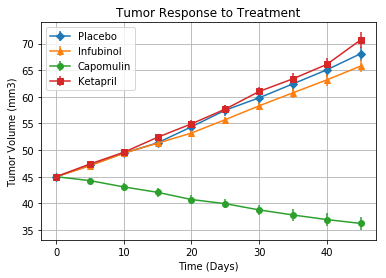

In [49]:
fig, ax = plt.subplots()
ax.errorbar(placebo_timept, placebo_vol, placebo_sem, fmt="-D")
ax.errorbar(Infubinol_timept, Infubinol_vol, Infubinol_sem, fmt="-^")
ax.errorbar(Capomulin_timept, Capomulin_vol, Capomulin_sem, fmt="-o")
ax.errorbar(Ketapril_timept, Ketapril_vol, Ketapril_sem, fmt="-s")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.grid()

ax.legend(("Placebo","Infubinol","Capomulin","Ketapril"))

In [ ]:
# Generate the Plot (with Error Bars)
tumorpivot["Capomulin"].plot(title = "Tumor Response to Treatment")
tumorpivot["Infubinol"].plot()
tumorpivot["Ketapril"].plot()
tumorpivot["Placebo"].plot()

fig, ax = plt.subplots()
ax.errorbar(tumorvol_sem_df["Timepoint"], meantumorvol, tumorvol_sem, fmt="o")


# Save the Figure
